# ARCHER Benchmark Baseline results

Baseline results for selected benchmarks run on ARCHER. Details on versions and compilation of the individual applications can be found in the individual sections below.

## Import required modules for results analysis

In [27]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})
import pandas as pd

In [28]:
import sys
sys.path.append('../python-modules')

In [29]:
from utilities import filemanip

## CASTEP: Large DNA Benchmark

### Version and compilation details

CASTEP Version: 18.1.0

Key options in the CASTEP Makefile:

```
COMMS_ARCH := mpi
FFT := fftw3
BUILD := fast
MATHLIBS := mkl10
```

Key dependencies:

- Compiler: GCC 6.3.0
- FFT is provided by the Cray programming FFTW 3 installation (version: 3.3.4.11)
- Math libraries are provided by MKL (version: 17.0.0.098)
- MPI provided by Cray MPICH (version: 7.5.2)

Full build instructions can be found at: https://github.com/hpc-uk/build-instructions/blob/master/CASTEP/ARCHER_18.1.0_gcc6_CrayMPT.md

### Benchmark and measuring performance

Details of the DNA benchmark can be found in this repository at:  https://github.com/hpc-uk/archer-benchmarks/blob/master/apps/CASTEP/

The typical parallel launch line within the job submission script is:

```
export OMP_NUM_THREADS=<nomp threads>
aprun -n <nprocess total> -N <nprocess per node> -d <nomp threads> castep.mpi polyA20-no-wat
```

where `<nprocess total>` is replaced by the total number of MPI processes, `<nprocess per node>` is replaced by the number of MPI processes per node and `<nomp threads>` is replaced by the number of OpenMP threads.

Performance is measured in 'mean SCF cycles per second'. This is calculated from the CASTEP output files by computing the SCF cycle times, removing the minimum and maximum value and then computing the mean of the remaining values.

For each job size, the benchmark has been run 5 times at random times and days.

### ARCHER baseline results analysis

In [30]:
from appanalysis import castep

In [31]:
castepfiles = filemanip.get_filelist('../apps/CASTEP/DNA/results/ARCHER_baseline', 'polyA20')

In [32]:
df_list = castep.create_df_list(castepfiles, 24)
castep_df = pd.DataFrame(df_list)


Peformance (Mean SCF cycles per second): 1 threads per MPI process
                 Perf                               Count
                  min    median       max      mean   sum
Nodes Cores                                              
256   6144   0.001898  0.002133  0.002655  0.002229     3
512   12288  0.002432  0.004043  0.004322  0.003710     4
1024  24576  0.005813  0.006347  0.006988  0.006374     4
2048  49152  0.008621  0.009020  0.009195  0.008976     5

Peformance (Mean SCF cycles per second): 2 threads per MPI process
                 Perf                               Count
                  min    median       max      mean   sum
Nodes Cores                                              
128   3072   0.001149  0.001210  0.001400  0.001257     5
256   6144   0.001912  0.002149  0.002768  0.002277     3
512   12288  0.001801  0.003869  0.004492  0.003508     4
1024  24576  0.005692  0.007119  0.007800  0.006933     4
2048  49152  0.010236  0.011387  0.011974  0.011275 

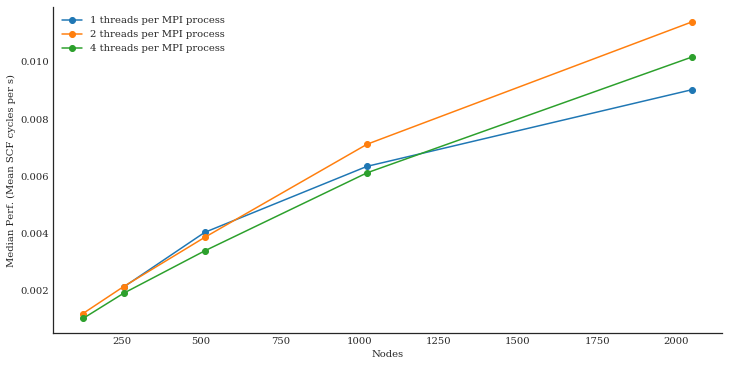

In [33]:
threading = [1, 2, 4]
for threads in threading:
    print('\nPeformance (Mean SCF cycles per second): {0} threads per MPI process'.format(threads))
    nodes, perf_median = castep.get_perf_stats(castep_df, threads, 'median', writestats=True)
    plt.plot(nodes, perf_median, '-o', label='{0} threads per MPI process'.format(threads))
    plt.xlabel('Nodes')
    plt.ylabel('Median Perf. (Mean SCF cycles per s)')
    plt.legend(loc='best')
    sns.despine()

## GROMACS: large benchmark

### Version and compilation details

GROMACS Version: 2018.2 (single precision)

Key dependencies:

- Compiler: GCC 6.3.0
- FFT is provided by the GROMACS self-build of FFTW (version: commercial-fftw-3.3.6-pl1-sse2-avx)
- Math libraries are provided by GROMACS
- MPI provided by Cray MPICH (version: 7.5.2)
- OpenMP is enabled

Full build instructions can be found at: https://github.com/hpc-uk/build-instructions/blob/master/GROMACS/ARCHER_2018.2_gcc6_ivybrg.md

### Benchmark and measuring performance

Details of the large benchmark can be found in this repository at:  https://github.com/hpc-uk/archer-benchmarks/tree/master/apps/GROMACS

The typical parallel launch line within the job submission script is:

```
export OMP_NUM_THREADS=<nomp threads>
aprun -n <nprocess total> -N <nprocess per node> mdrun_mpi -s nsteps800.tpr -deffnm nc2-cubic-md -ntomp <nomp threads>
```

where `<nprocess total>` is replaced by the total number of MPI processes, `<nprocess per node>` is replaced by the number of MPI processes per node and `<nomp threads>` is replaced by the number of OpenMP threads.

Performance is measured in 'ns/day'. This is calculated by the GROMACS software itself and is read directly from the GROMACS output.

For each job size, the benchmark has been run 5 times at random times and days.

### ARCHER baseline results analysis

In [34]:
from appanalysis import gromacs

In [35]:
gromacsfiles = filemanip.get_filelist('../apps/GROMACS/large/results/ARCHER_baseline_noconfout', 'nc2-cubic-md')

In [36]:
df_list = gromacs.create_df_list(gromacsfiles, 24)
gromacs_df = pd.DataFrame(df_list)


Peformance (ns/day): 1 thread per MPI process
              Perf                        Count
               min  median    max    mean   sum
Nodes Cores                                    
2     48     0.050  0.0500  0.050  0.0500     1
4     96     0.083  0.0830  0.083  0.0830     1
8     192    0.161  0.1610  0.161  0.1610     1
16    384    0.312  0.3120  0.312  0.3120     1
32    768    0.620  0.6200  0.620  0.6200     1
64    1536   1.144  1.1440  1.144  1.1440     1
128   3072   2.659  2.6590  2.659  2.6590     1
256   6144   3.016  3.0160  3.016  3.0160     1
512   12288  4.163  4.1630  4.163  4.1630     1
1024  24576  4.456  4.5370  4.618  4.5370     2
2048  49152  5.466  5.9765  6.487  5.9765     2


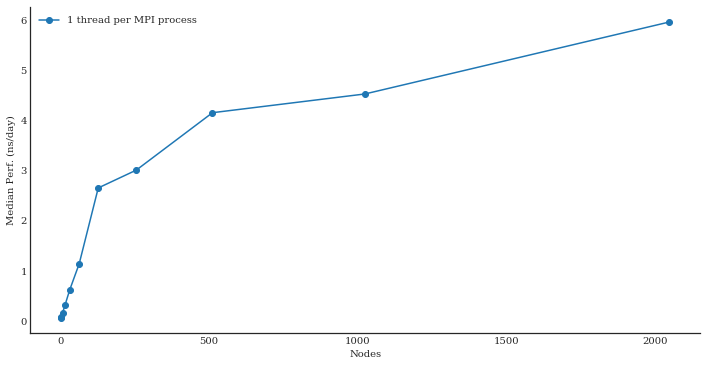

In [37]:
print('\nPeformance (ns/day): 1 thread per MPI process')
nodes, perf_median = gromacs.get_perf_stats(gromacs_df, 1, 'median', writestats=True)
plt.plot(nodes, perf_median, '-o', label='1 thread per MPI process')
plt.xlabel('Nodes')
plt.ylabel('Median Perf. (ns/day)')
plt.legend(loc='best')
sns.despine()

## OpenSBLI: Taylor-Green Vortex 1024 benchmark

### Version and compilation details

OpenSBLI version: as supplied for the benchmark

Key dependencies:

- Compiler: Cray compiler (version: 8.5.8)
- MPI provided by Cray MPICH (version: 7.5.2)
- HDF5 is provided by Cray HDF5 (version: 1.10.0.1)

Full build instructions can be found at: https://github.com/hpc-uk/archer-benchmarks/blob/master/apps/OpenSBLI/source/ARCHER_build.md

### Benchmark and measuring performance

Details of the Taylor-Green Vortex 1024 benchmark can be found in this repository at: https://github.com/hpc-uk/archer-benchmarks/tree/master/apps/OpenSBLI

The typical parallel launch line within the job submission script is:

```
aprun -n <nprocess total> -N <nprocess per node> ./OpenSBLI_mpi
```

where `<nprocess total>` is replaced by the total number of MPI processes and `<nprocess per node>` is replaced by the number of MPI processes per node.

Performance is measured in 'interations/s'. The total runtime and number of iterations are read directly from the OpenSBLI ouptut and these are used to compute the number of iterations per second.

For each job size, the benchmark has been run 5 times at random times and days.

### ARCHER baseline results analysis

In [38]:
from appanalysis import osbli

In [39]:
osblifiles = filemanip.get_filelist('../apps/OpenSBLI/TGV1024ss/results/ARCHER_baseline/', 'output')

In [40]:
df_list = osbli.create_df_list(osblifiles, 24)
osbli_df = pd.DataFrame(df_list)


Peformance (iterations/s): 1 thread per MPI process
                  Perf                                  Count
                   min     median        max       mean   sum
Nodes Cores                                                  
4     96      0.033215   0.033215   0.033215   0.033215     1
8     192     0.095286   0.095786   0.096764   0.095813     5
16    384     0.201192   0.201630   0.203884   0.202357     5
32    768     0.348449   0.353289   0.353680   0.351675     5
64    1536    0.690417   0.695523   0.702692   0.695659     5
128   3072    1.516838   1.521812   1.545425   1.526915     6
256   6144    2.761775   2.787851   2.812599   2.788302     6
512   12288   5.280667   5.473873   5.544743   5.456650     5
1024  24576  10.650875  10.768204  11.377600  10.930993     5
2048  49152  17.605014  17.775566  19.214880  18.169327     5


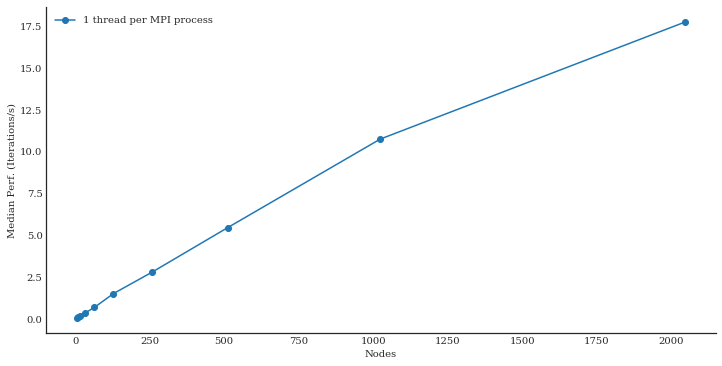

In [41]:
print('\nPeformance (iterations/s): 1 thread per MPI process')
nodes, perf_median = osbli.get_perf_stats(osbli_df, 'median', writestats=True)
plt.plot(nodes, perf_median, '-o', label='1 thread per MPI process')
plt.xlabel('Nodes')
plt.ylabel('Median Perf. (Iterations/s)')
plt.legend(loc='best')
sns.despine()

## CP2K: LiH-HFX benchmark

### Version and compilation details

CP2K version: 6.1-branch

Key dependencies:

- Compiler: GCC 6.3.0
- MPI provided by Cray MPICH (version: 7.5.5)
- FFT is provided by the Cray programming FFTW 3 installation (version: 3.3.4.11)
- ELPA (version 2015.05.001 was used for this build)
- libint (version 1.1.4 was used for this build)
- libxc (version 4.2.3 was used for this build)
- libxsmm (cloned from GitHub on 13 Sep 2018)
- PLUMED2 (version 2.6.3 was used for this build) 

Full build instructions can be found at: https://github.com/hpc-uk/build-instructions/blob/master/CP2K/CP2K_6.1_ARCHER.md

### Benchmark and measuring performance

Details of the LiH-HFX benchmark can be found in this repository at: https://github.com/hpc-uk/archer-benchmarks/tree/master/apps/CP2K

The typical parallel launch line within the job submission script is:

```
export OMP_NUM_THREADS=<nomp threads>
aprun -n <nprocess total> -N <nprocess per node> -d <nomp threads> cp2k.psmp -i input_bulk_HFX_3.inp
```

where `<nprocess total>` is replaced by the total number of MPI processes, `<nprocess per node>` is replaced by the number of MPI processes per node and `<nomp threads>` is replaced by the number of OpenMP threads.

Performance is measured in 'calculations/s'. The total runtime is read directly from the CP2K ouptut and used to compute the number of calculations per second.

For each job size, the benchmark has been run 5 times at random times and days.

### ARCHER baseline results analysis

In [42]:
from appanalysis import cp2k

In [43]:
cp2kfiles = filemanip.get_filelist('../apps/CP2K/results/ARCHER_baseline/', 'CP2K_')

In [44]:
df_list = cp2k.create_df_list(cp2kfiles, 24)
cp2k_df = pd.DataFrame(df_list)


Peformance (Calculations/s): 6 threads per MPI process
                 Perf                               Count
                  min    median       max      mean   sum
Nodes Cores                                              
128   3072   0.002884  0.002946  0.003000  0.002943     5
256   6144   0.004691  0.004980  0.005083  0.004941     5
512   12288  0.007043  0.007600  0.008133  0.007639     5
1024  24576  0.010139  0.010169  0.010834  0.010376     5
2048  49152  0.011915  0.012969  0.014780  0.013156     5


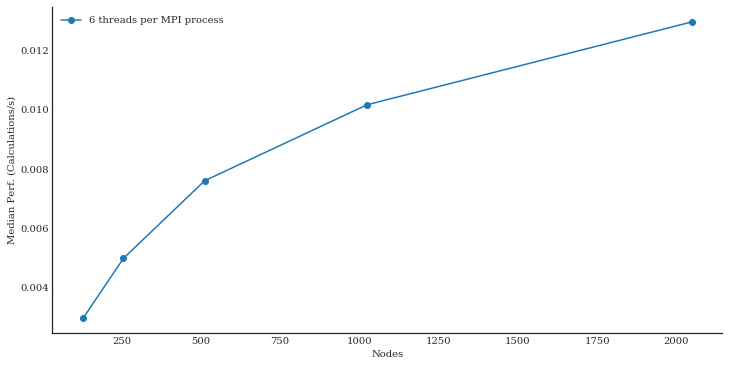

In [45]:
print('\nPeformance (Calculations/s): 6 threads per MPI process')
nodes, perf_median = cp2k.get_perf_stats(cp2k_df, 6, 'median', writestats=True)
plt.plot(nodes, perf_median, '-o', label='6 threads per MPI process')
plt.xlabel('Nodes')
plt.ylabel('Median Perf. (Calculations/s)')
plt.legend(loc='best')
sns.despine()

## HadGEM3: G31 coupled model benchmark

### Version and compilation details

Version: benchmark case

Key dependencies:

- Compiler: Cray compiler, CCE (version: 8.5.8)
- MPI provided by Cray MPICH (version: 7.5.5)

Full build instructions can be found at: https://github.com/hpc-uk/build-instructions/blob/master/OASIS/OASIS_ACRHER.md

### Benchmark and measuring performance

Details of the benchmark can be found in this repository at: https://github.com/hpc-uk/archer-benchmarks/tree/master/apps/HadGEM3

Performance is measured in 'calculations/s'. The output files from this benchmark are too large to be added to the repository so the raw data is contained in a CSV file which is then used for the analysis below.

For each job size, the benchmark has been run 5 times at random times and days.

### ARCHER baseline results analysis

In [46]:
from appanalysis import hadgem3

In [47]:
hadgem3_df = pd.read_csv('../apps/HadGEM3/results/ARCHER_baseline/HadGEM3_ARCHER_baseline_results.csv')
cpn = 24
hadgem3_df['Cores'] = hadgem3_df.apply(lambda row: cpn*row.Nodes, axis=1)
hadgem3_df['Perf'] = hadgem3_df.apply(lambda row: 1.0/row.Time, axis=1)
hadgem3_df['Count'] = hadgem3_df.apply(lambda row: 1, axis=1)


Peformance (Calculations/s):
                                                                 Perf  \
                                                                  min   
Nodes Cores UM cores-x UM cores-y NEMO cores-i NEMO cores-j             
152   3648  60         37         24           36            0.000517   
168   4032  48         37         12           18            0.000543   
189   4536  48         37         24           36            0.000610   
211   5064  48         37         33           42            0.000520   
276   6624  60         47         24           36            0.000654   
298   7152  60         47         33           42            0.000565   

                                                                       \
                                                               median   
Nodes Cores UM cores-x UM cores-y NEMO cores-i NEMO cores-j             
152   3648  60         37         24           36            0.000558   
168   4032  48      

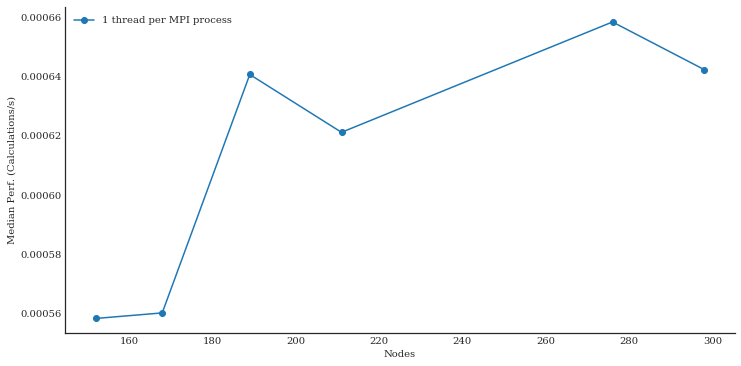

In [48]:
print('\nPeformance (Calculations/s):')
nodes, perf_median = hadgem3.get_perf_stats(hadgem3_df, 'median', writestats=True)
plt.plot(nodes, perf_median, '-o', label='1 thread per MPI process')
plt.xlabel('Nodes')
plt.ylabel('Median Perf. (Calculations/s)')
plt.legend(loc='best')
sns.despine()

## benchio: 256^3 parallel write benchmark

### Version and compilation details

benchio version: latest from repository

Key dependencies:

- Compiler: Cray compiler, CCE (version: 8.5.8)
- MPI provided by Cray MPICH (version: 7.5.5)

Full build instructions can be found at:

### Benchmark and measuring performance

Details of the benchio benchmark can be found in this repository at: https://github.com/hpc-uk/archer-benchmarks/tree/master/synth/benchio

The typical parallel launch line within the job submission script is:

```
aprun -n <nprocess total> -N <nprocess per node> benchio
```

where `<nprocess total>` is replaced by the total number of MPI processes and `<nprocess per node>` is replaced by the number of MPI processes per node.

Write performance is measured in 'GiB/s'. The performance is read directly from the benchio output. In the tabl;e below, 'Writers' corresponds to the number of cores writing in parallel and 'Clients' corresponds to the number of nodes writing in parallel. On the ARCHER Lustre file system: fs3, maximal striping is used (stripe count of 48) and the stripe size is set to 1 MiB.

For each job size, the benchmark has been run 5 times at random times and days.

### ARCHER baseline results analysis

In [49]:
from synthanalysis import benchio

In [50]:
benchiofiles = filemanip.get_filelist('../synth/benchio/results/ARCHER_baseline/', 'benchio_')

In [51]:
df_list = benchio.create_df_list(benchiofiles, 24)
benchio_df = pd.DataFrame(df_list)


Peformance (GiB/s):
                                          Write                             \
                                            min       median           max   
Writers Clients Striping LocalSize                                           
24      1       -1       256         409.279107   588.801465    672.894825   
48      2       -1       256         984.552956  1244.456581   1300.744946   
96      4       -1       256         793.295651  2130.806813   2216.437661   
192     8       -1       256         574.457422  2392.006959   3638.948175   
384     16      -1       256         729.121625  3863.008051   5497.900280   
768     32      -1       256         883.297371  3177.110038   5733.502643   
1536    64      -1       256        3802.696717  5505.913305   8667.764254   
3072    128     -1       256        2707.862334  5465.137726  10376.945212   
6144    256     -1       256        3064.858006  4730.970120   8591.026594   
12288   512     -1       256        1849.33

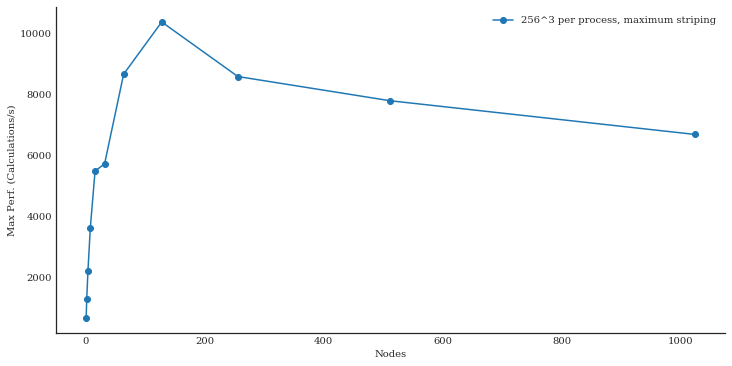

In [52]:
print('\nPeformance (GiB/s):')
cores, nodes, perf_median = benchio.get_perf_stats(benchio_df, -1, 256, 'max', writestats=True)
plt.plot(nodes, perf_median, '-o', label='256^3 per process, maximum striping')
plt.xlabel('Nodes')
plt.ylabel('Max Perf. (Calculations/s)')
plt.legend(loc='best')
sns.despine()